<a href="https://colab.research.google.com/github/johnsov/PNN-Farallones/blob/main/Monitoreo-recurso_hidrico-mineria-actividad_minera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configure la temporalidad

In [ ]:
ano = int(input("Ingrese el año que desea visualizar: "))

Ingrese el año que desea visualizar: 2025


# Bibliotecas


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

# Diccionarios

In [ ]:
bmwp_col_dict = {
    "Perlidae": 10,#S
    "Oligoneuriidae": 10,#S
    "Euthyplociidae": 10,
    "Polymitarcyidae": 10,
    "Odontoceridae": 10,
    "Glossosomatidae": 10,
    "Rhyacophilidae": 10,
    "Calamoceratidae": 10,
    "Hydroptilidae": 10,
    "Anomalopsychidae": 10,
    "Atriplectidae":10,
    "Psephenidae": 10,
    "Ptilodactylidae": 10,
    "Lampyridae": 10,
    "Polythoridae": 10,
    "Blepharoceridae": 10,
    "Unionidae": 10,
    "Lymnssiilidae":10, #NE
    "Hidridae": 10,
    "Leptophlebiidae":9,
    "Ephemeridae":9,
    "Hydrobiosidae":9,
    "Philopotamidae": 9,
    "Xiphocentronidae": 9,
    "Gyrinidae": 9,
    "Scirtidae": 9,
    "Gomphidae": 9,
    "Megapodagrionidae": 9,
    "Coenagrionidae": 9,
    "Simuliidae": 9,
    "Gordiidae": 9,
    "Chordodidae": 9,
    "Pyralidae": 9,
    "Ampullariidae": 9,
    "Hirudinidae": 9,
    "Baetidae": 8,
    "Caenidae": 8,
    "Hydropsychidae": 8,
    "Leptoceridae": 8,
    "Helicopsychidae": 8,
    "Dytiscidae": 8,
    "Dryopidae": 8,
    "Lestidae": 8,
    "Calopterygidae": 8,
    "Pleidae": 8,
    "Saldidae": 8,
    "Gerridae":8,
    "Veliidae": 8,
    "Hebridae": 8,
    "Dixidae": 8,
    "Palaemonidae": 8,
    "Pseudothelphusidae": 8,
    "Chilinidae":8,
    "Tricorythidae": 7,
    "Leptohyphidae": 7,
    "Polycentropodidae": 7,
    "Elmidae": 7,
    "Staphylinidae": 7,
    "Aeshnidae": 7,
    "Naucoridae": 7,
    "Notonectidae": 7,
    "Mesoveliidae": 7,
    "Corixidae": 7,
    "Psychodidae": 7,
    "Ancylidae": 7,
    "Planorbidae": 7,
    "Melaniidae": 7,
    "Hydrobiidae": 7,
    "Neritidae": 7,
    "Limnichidae": 6,
    "Lutrochidae": 6,
    "Libellulidae": 6,
    "Belostomatidae": 6,
    "Hydrometridae": 6,
    "Gelastocoridae": 6,
    "Nepidae": 6,
    "Dolichopodidae":6,
    "Corydalidae": 6,
    "Sialidae": 6,
    "Atyidae": 6,
    "Hyalellidae": 6,
    "Planariidae": 6,
    "Dugesiidae": 6,
    "Chrysomelidae": 5,
    "Haliplidae": 5,
    "Curculionidae": 5,
    "Thiaridae": 5,
    "Tabanidae": 5,
    "Stratiomyidae": 5,
    "Empididae": 5,
    "Hydrophilidae": 4,
    "Noteridae": 4,
    "Hydraenidae": 4,
    "Tipulidae": 4,
    "Ceratopogonidae": 4,
    "Limnaeidae": 4,
    "Sphaeriidae": 4,
    "Culicidae": 3,
    "Muscidae": 3,
    "Sciomyzidae": 3,
    "Physidae": 3,
    "Glossiphoniidae": 3,
    "Cyclobdellidae":3,
    "Cylicobdellidae":3,
    "Chironomidae": 2,
    "Ephydridae": 2,
    "Syrphidae": 2,
    "Tubificidae": 1
}

# Recurso hidrico


## Carga de datos

Cargar la consulta de recurso hidrico proveniente de SMART con el nombre "rh.csv"

In [ ]:
rh=pd.read_csv("/content/rh.csv", sep=';')
rh['Fecha de la Coordenada '] = pd.to_datetime(rh['Fecha de la Coordenada '])
rh.head(5)

,ID del muestreo,Lider del Muestreo,Fecha de la Coordenada,Hora de la Coordenada,X,Y,Muestreo|Cuenca,Categoria de Observación 2,Ancho cauce,Caudal,...,Oxigeno disuelto (mg/L),Oxigeno disuelto (porcentaje sat),ph,Salinidad (partes por millon),Salinidad (psu),Solidos disueltos TDS (g/L),Solidos suspendidos totales TSS (mg/L),Temperatura (Grados celsius),Turbidez (NTU),Ubicacion
0,pFAR_000274,John Sebastian Ovalle Talaga,2025-09-24,10:28:51 a. m.,-76.607237,3.388515,Melendez,Caudal,5.4,716.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,pFAR_000274,John Sebastian Ovalle Talaga,2025-09-24,12:00:00 a. m.,-76.607237,3.388515,Melendez,Fisicoquimicos,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pFAR_000275,John Sebastian Ovalle Talaga,2025-09-24,11:09:25 a. m.,-76.604407,3.382460,Melendez,Caudal,0.8,6.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aguas abajo
3,pFAR_000275,John Sebastian Ovalle Talaga,2025-09-24,11:02:12 a. m.,-76.604387,3.382397,Melendez,Caudal,0.9,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aguas arriba
4,pFAR_000275,John Sebastian Ovalle Talaga,2025-09-24,12:00:00 a. m.,-76.604407,3.382460,Melendez,Fisicoquimicos,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Filtre por año. Ingrese el año que quiere visualizar

In [ ]:
# Filtra los datos para ese año
rh_filtro1 = rh[rh['Fecha de la Coordenada '].dt.year == ano]

## Indicador 1.1 - Caudal

In [ ]:
columnas_elegibles_caudal = ['Fecha de la Coordenada ', 'Localidad', 'Caudal', 'Lider del Muestreo', 'Comentarios del registro']
df_caudal = rh_filtro1[rh_filtro1['Categoria de Observación 2'] == 'Caudal']
df_caudal = df_caudal.loc[:, columnas_elegibles_caudal]
df_caudal_lim = df_caudal[df_caudal['Localidad'].str.contains('limite', case=False, na=False)]
df_caudal_lim.head(5)

,Fecha de la Coordenada,Localidad,Caudal,Lider del Muestreo,Comentarios del registro
0,2025-09-24,Melendez - limite,716.00,John Sebastian Ovalle Talaga,metodo de flotador
5,2025-09-24,Pance - limite,578.00,John Sebastian Ovalle Talaga,metodo de flotador
7,2025-09-18,Felidia - limite,1700.09,Gustavo Adolfo Rodríguez,Flotador
9,2025-09-16,Pichinde - limite,498.80,Leonardo Belalcazar Salcedo,Caudal medido por método de flotador en una es...
12,2025-09-15,Pance - limite,NaN,Leonardo Belalcazar Salcedo,No se pudo realizar medición de caudal debido ...


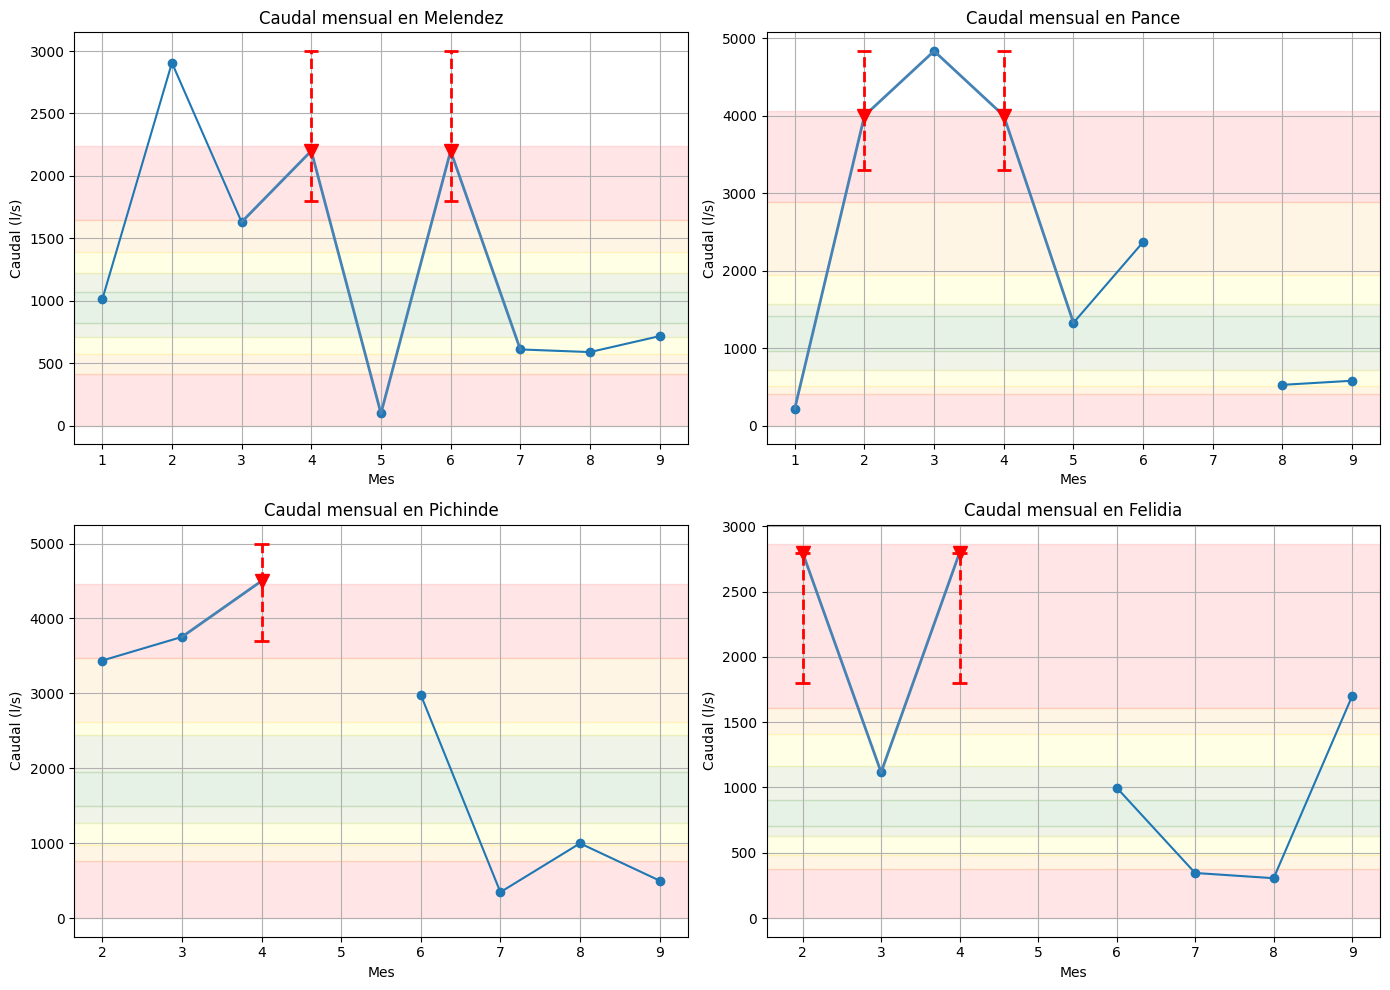

In [ ]:
def marcar_seguridad(ax, y1, y2, x3, y3, color='red', label='No medido por seguridad'):
    # Punto de seguridad
    ax.plot(x3, y3, marker='v', color=color, markersize=10, label=label)

    # Línea vertical punteada del intervalo
    ax.vlines(x3, y1, y2, linestyle='--', color=color, linewidth=2)

    # Línea horizontal superior (la "T" de arriba)
    ax.hlines(y2, x3 - 0.1, x3 + 0.1, color=color, linewidth=2)

    # Línea horizontal inferior (la "T" de abajo)
    ax.hlines(y1, x3 - 0.1, x3 + 0.1, color=color, linewidth=2)


# Diccionario de zonas de caudal por localidad
zonas_caudal_por_localidad = {
    'pance': [
        (0, 408, 'red'),
        (408, 516, 'orange'),
        (516, 721, 'yellow'),
        (721, 965, 'olivedrab'),
        (965, 1412, 'green'),
        (1412, 1572, 'olivedrab'),
        (1572, 1938, 'yellow'),
        (1938, 2883, 'orange'),
        (2883, 4063, 'red'),
    ],
    'melendez': [
        (0, 414, 'red'),
        (414, 572, 'orange'),
        (572, 712, 'yellow'),
        (712, 825, 'olivedrab'),
        (825, 1068, 'green'),
        (1068, 1218, 'olivedrab'),
        (1218, 1392, 'yellow'),
        (1392, 1646, 'orange'),
        (1646, 2236, 'red'),
    ],
    'felidia': [
        (0, 378, 'red'),
        (378, 482, 'orange'),
        (482, 625, 'yellow'),
        (625, 708, 'olivedrab'),
        (708, 906, 'green'),
        (906, 1167, 'olivedrab'),
        (1167, 1408, 'yellow'),
        (1408, 1611, 'orange'),
        (1611, 2869, 'red'),
    ],
    'pichinde': [
        (0, 759, 'red'),
        (759, 971, 'orange'),
        (971, 1272, 'yellow'),
        (1272, 1501, 'olivedrab'),
        (1501, 1952, 'green'),
        (1952, 2443, 'olivedrab'),
        (2443, 2612, 'yellow'),
        (2612, 3471, 'orange'),
        (3471, 4464, 'red'),
    ],
}


# Asegúrate de que la columna fecha esté en formato datetime
df_caudal_lim['Fecha de la Coordenada '] = pd.to_datetime(df_caudal_lim['Fecha de la Coordenada '])

# Crea una nueva columna con el número del mes
df_caudal_lim['Mes'] = df_caudal_lim['Fecha de la Coordenada '].dt.month

# Define las localidades a graficar
localidades = ['Melendez', 'Pance', 'Pichinde', 'Felidia']

# Configura la figura y los ejes
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()  # Aplanar para facilitar la iteración

# Generar cada subgráfico
for i, localidad in enumerate(localidades):
    # Filtrar por localidad y agrupar por mes
    datos_localidad = df_caudal_lim[df_caudal_lim['Localidad'].str.contains(localidad, case=False, na=False)]
    datos_mes = datos_localidad.groupby('Mes')['Caudal'].mean()

    # Agregar zonas de color si hay definidas para esa localidad
    zonas = zonas_caudal_por_localidad.get(localidad.lower())
    if zonas:
        for ymin, ymax, color in zonas:
            axs[i].axhspan(ymin, ymax, color=color, alpha=0.1)

    # Graficar
    axs[i].plot(range(1, 13), datos_mes.reindex(range(1, 13)), marker='o')
    axs[i].set_title(f'Caudal mensual en {localidad}')
    axs[i].set_xlabel('Mes')
    axs[i].set_ylabel('Caudal (l/s)')
    axs[i].set_xticks(range(1, 13))
    axs[i].grid(True)

#puntos que no se hicieron por seguridad
axs[0].plot([3, 4], [1630, 2200], color='steelblue', linewidth=2)
axs[0].plot([4,5], [2200, 96.74], color='steelblue', linewidth=2)
axs[0].plot([5,6], [96.74, 2200], color='steelblue', linewidth=2)
axs[0].plot([6,7], [2200,609.37], color='steelblue', linewidth=2)#


axs[1].plot([1,2], [217.77, 4000 ], color='steelblue', linewidth=2)
axs[1].plot([2,3], [4000, 4835], color='steelblue', linewidth=2)
axs[1].plot([3,4], [4835,4000], color='steelblue', linewidth=2)
axs[1].plot([4,5], [4000,1326], color='steelblue', linewidth=2)

axs[2].plot([3,4], [3753,4500], color='steelblue', linewidth=2)

axs[3].plot([2,3], [2800,1116.0], color='steelblue', linewidth=2)
axs[3].plot([3,4], [1116.0,2800], color='steelblue', linewidth=2)
#axs[3].plot([8,9], [,1700.09], color='steelblue', linewidth=2)



marcar_seguridad(axs[0],y1=1800, y2=3000, x3=4, y3=2200 )# melendez
marcar_seguridad(axs[0],y1=1800, y2=3000, x3=6, y3=2200 )# melendez
marcar_seguridad(axs[1],y1=3300, y2=4835, x3=2, y3=4000 )# Pance
marcar_seguridad(axs[1],y1=3300, y2=4835, x3=4, y3=4000 )# Pance
marcar_seguridad(axs[2],y1=3700, y2=5000, x3=4, y3=4500 )# pichinde
marcar_seguridad(axs[3],y1=1800, y2=2800, x3=2, y3=2800 )# felidia
marcar_seguridad(axs[3],y1=1800, y2=2800, x3=4, y3=2800 )# felidia

# Ajustar diseño
plt.tight_layout()
# Guardar como archivo de imagen
plt.savefig("caudal_subgraficas.png", dpi=300, bbox_inches='tight')
plt.show()


## Indicador 1.2 - Conductividad especifica

In [ ]:
columnas_elegibles_condesp = ['Fecha de la Coordenada ', 'Localidad', 'Conductividad especifica (microsiemens centimetro uS/cm)', 'Lider del Muestreo', 'Comentarios del registro']
df_condesp = rh_filtro1[rh_filtro1['Categoria de Observación 2'] == 'Fisicoquimicos']
df_condesp = df_condesp.loc[:, columnas_elegibles_condesp]
df_condesp.head(5)

,Fecha de la Coordenada,Localidad,Conductividad especifica (microsiemens centimetro uS/cm),Lider del Muestreo,Comentarios del registro
1,2025-09-24,Melendez - limite,NaN,John Sebastian Ovalle Talaga,no se pudo realizar porque las sondas siguen e...
4,2025-09-24,El Cabuyo - Q. El Cabuyo,NaN,John Sebastian Ovalle Talaga,no se pudo realizar porque las sondas siguen e...
6,2025-09-24,Pance - limite,NaN,John Sebastian Ovalle Talaga,no fue posible realizarlo porque las sondas si...
8,2025-09-18,Felidia - limite,40.0,Gustavo Adolfo Rodríguez,Río crecido
10,2025-09-16,Pichinde - limite,79.1,Leonardo Belalcazar Salcedo,NaN


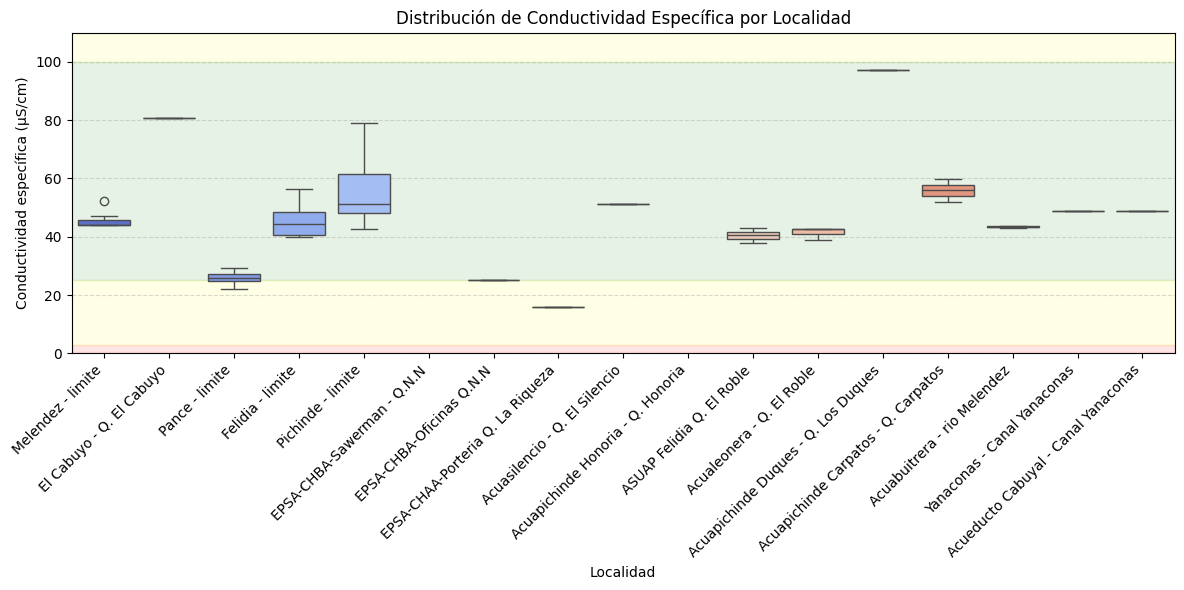

In [ ]:
zonas_ce = [
        (0.5, 3, 'red'),
        (3, 25, 'yellow'),
        (25, 100, 'green'),
        (100, 1500, 'yellow'),
        (1500, 10000, 'red'),
    ] #estos rangos estan en regleta parametros fisicoquimicos y paudales de PNN FC

plt.figure(figsize=(12, 6))

# Agregar las zonas de color al fondo
for ymin, ymax, color in zonas_ce:
    plt.axhspan(ymin, ymax, color=color, alpha=0.1)

# Crear gráfico de cajas
sns.boxplot(
    data=df_condesp,
    x='Localidad',
    y='Conductividad especifica (microsiemens centimetro uS/cm)',
    palette='coolwarm'
)

# Limitar el eje Y
plt.ylim(0, 110)

# Ajustes estéticos
plt.title('Distribución de Conductividad Específica por Localidad')
plt.xlabel('Localidad')
plt.ylabel('Conductividad específica (µS/cm)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig("conductividad.png", dpi=300, bbox_inches='tight')
plt.show()

## Indicador 1.3 - Oxigeno disuelto

In [ ]:
columnas_elegibles_oxidis = ['Fecha de la Coordenada ', 'Localidad', 'Oxigeno disuelto (mg/L)', 'Lider del Muestreo', 'Comentarios del registro']
df_oxidis = rh_filtro1[rh_filtro1['Categoria de Observación 2'] == 'Fisicoquimicos']
df_oxidis = df_oxidis.loc[:, columnas_elegibles_oxidis]
df_oxidis.head(5)

,Fecha de la Coordenada,Localidad,Oxigeno disuelto (mg/L),Lider del Muestreo,Comentarios del registro
1,2025-09-24,Melendez - limite,NaN,John Sebastian Ovalle Talaga,no se pudo realizar porque las sondas siguen e...
4,2025-09-24,El Cabuyo - Q. El Cabuyo,NaN,John Sebastian Ovalle Talaga,no se pudo realizar porque las sondas siguen e...
6,2025-09-24,Pance - limite,NaN,John Sebastian Ovalle Talaga,no fue posible realizarlo porque las sondas si...
8,2025-09-18,Felidia - limite,8.24,Gustavo Adolfo Rodríguez,Río crecido
10,2025-09-16,Pichinde - limite,7.87,Leonardo Belalcazar Salcedo,NaN


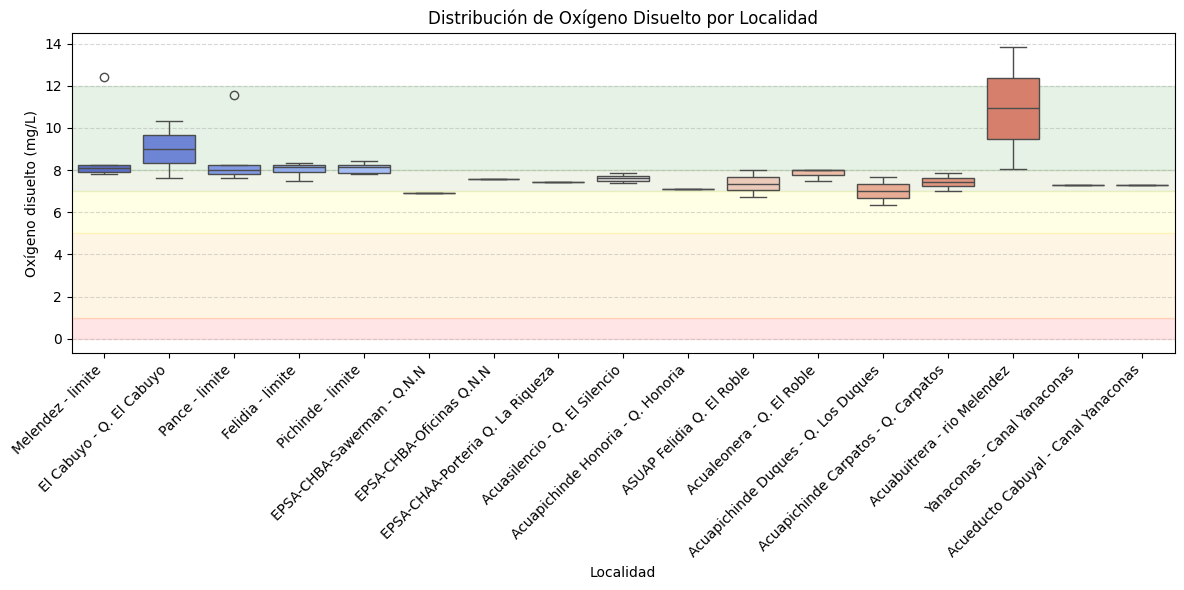

In [ ]:
zonas_oxigeno = [
    (0, 1, 'red'),
    (1, 5, 'orange'),
    (5, 7, 'yellow'),
    (7, 8, 'olivedrab'),
    (8, 12, 'green'),
]


plt.figure(figsize=(12, 6))

# Agregar las zonas de color al fondo
for ymin, ymax, color in zonas_oxigeno:
    plt.axhspan(ymin, ymax, color=color, alpha=0.1)

# Gráfico de cajas
sns.boxplot(
    data=df_oxidis,
    x='Localidad',
    y='Oxigeno disuelto (mg/L)',
    palette='coolwarm'
)

# Ajustes estéticos
plt.title('Distribución de Oxígeno Disuelto por Localidad')
plt.xlabel('Localidad')
plt.ylabel('Oxígeno disuelto (mg/L)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig("oxigeno_disuelto.png", dpi=300, bbox_inches='tight')
plt.show()

## Indicador 1.4 - pH

In [ ]:
columnas_elegibles_ph = ['Fecha de la Coordenada ', 'Localidad', 'ph', 'Lider del Muestreo', 'Comentarios del registro']
df_ph = rh_filtro1[rh_filtro1['Categoria de Observación 2'] == 'Fisicoquimicos']
df_ph = df_ph.loc[:, columnas_elegibles_ph]
df_ph.head(5)

,Fecha de la Coordenada,Localidad,ph,Lider del Muestreo,Comentarios del registro
1,2025-09-24,Melendez - limite,NaN,John Sebastian Ovalle Talaga,no se pudo realizar porque las sondas siguen e...
4,2025-09-24,El Cabuyo - Q. El Cabuyo,NaN,John Sebastian Ovalle Talaga,no se pudo realizar porque las sondas siguen e...
6,2025-09-24,Pance - limite,NaN,John Sebastian Ovalle Talaga,no fue posible realizarlo porque las sondas si...
8,2025-09-18,Felidia - limite,7.95,Gustavo Adolfo Rodríguez,Río crecido
10,2025-09-16,Pichinde - limite,8.42,Leonardo Belalcazar Salcedo,NaN


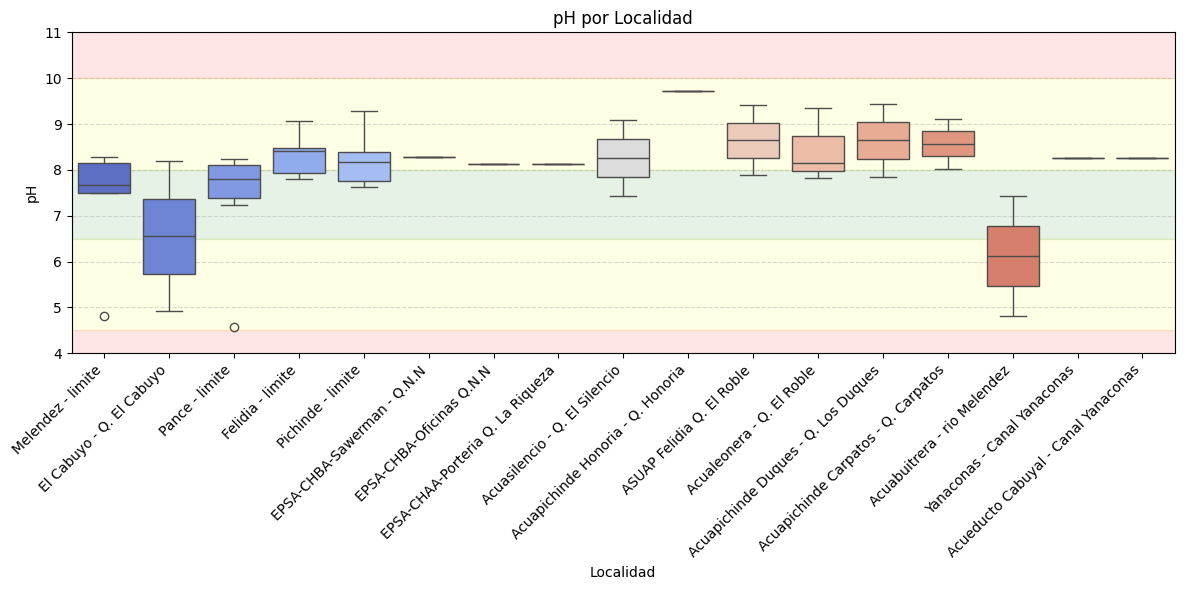

In [ ]:
zonas_ph = [
    (0, 4.5, 'red'),
    (4.5, 6.5, 'yellow'),
    (6.5, 8, 'green'),
    (8, 10, 'yellow'),
    (10, 14, 'red'),
]#sacados de la regleta


plt.figure(figsize=(12, 6))

# Agregar las zonas de color al fondo
for ymin, ymax, color in zonas_ph:
    plt.axhspan(ymin, ymax, color=color, alpha=0.1)

# Gráfico de cajas
sns.boxplot(
    data=df_ph,
    x='Localidad',
    y='ph',
    palette='coolwarm'
)

# Limitar el eje Y
plt.ylim(4, 11)

# Ajustes estéticos
plt.title('pH por Localidad')
plt.xlabel('Localidad')
plt.ylabel('pH')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig("ph.png", dpi=300, bbox_inches='tight')
plt.show()

## Indicador 1.5 - Turbidez

In [ ]:
columnas_elegibles_tur = ['Fecha de la Coordenada ', 'Localidad', 'Turbidez (NTU)', 'Lider del Muestreo', 'Comentarios del registro']
df_tur = rh_filtro1[rh_filtro1['Categoria de Observación 2'] == 'Fisicoquimicos']
df_tur = df_tur.loc[:, columnas_elegibles_tur]
df_tur.head(5)

,Fecha de la Coordenada,Localidad,Turbidez (NTU),Lider del Muestreo,Comentarios del registro
1,2025-09-24,Melendez - limite,NaN,John Sebastian Ovalle Talaga,no se pudo realizar porque las sondas siguen e...
4,2025-09-24,El Cabuyo - Q. El Cabuyo,NaN,John Sebastian Ovalle Talaga,no se pudo realizar porque las sondas siguen e...
6,2025-09-24,Pance - limite,NaN,John Sebastian Ovalle Talaga,no fue posible realizarlo porque las sondas si...
8,2025-09-18,Felidia - limite,10.67,Gustavo Adolfo Rodríguez,Río crecido
10,2025-09-16,Pichinde - limite,4.21,Leonardo Belalcazar Salcedo,NaN


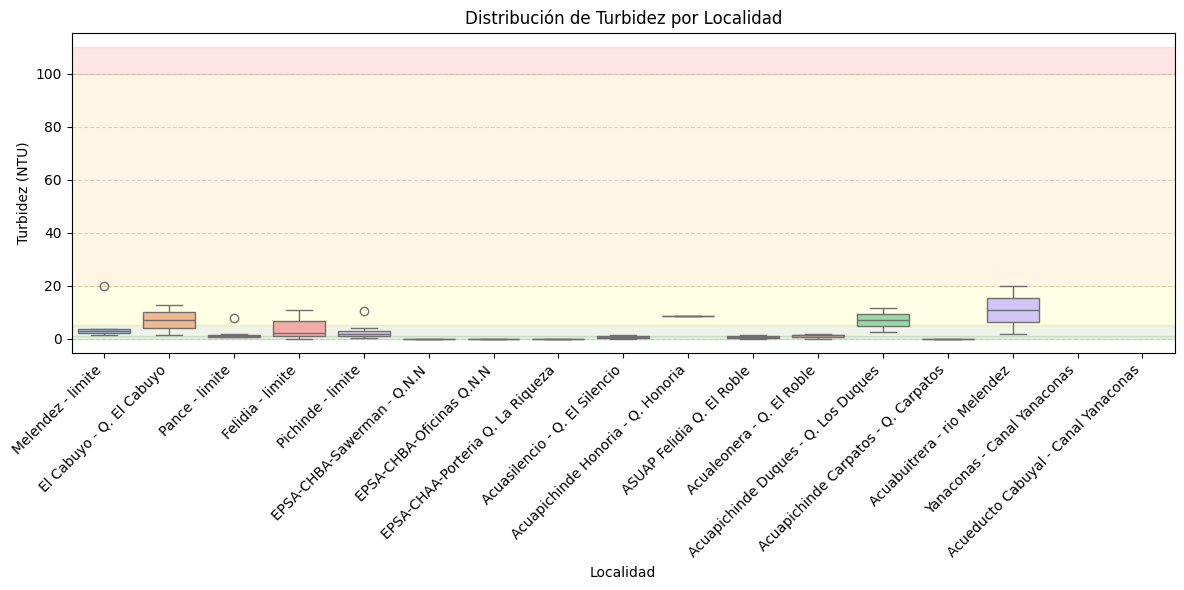

In [ ]:
zonas_turbidez = [
    (0, 1, 'green'),
    (1, 5, 'olivedrab'),
    (5, 20, 'yellow'),
    (20, 100, 'orange'),
    (100, 110, 'red'),
]


plt.figure(figsize=(12, 6))

# Agregar zonas de color al fondo
for ymin, ymax, color in zonas_turbidez:
    plt.axhspan(ymin, ymax, color=color, alpha=0.1)

# Gráfico de cajas
sns.boxplot(
    data=df_tur,
    x='Localidad',
    y='Turbidez (NTU)',
    palette='pastel'
)

# Ajustes estéticos
plt.title('Distribución de Turbidez por Localidad')
plt.xlabel('Localidad')
plt.ylabel('Turbidez (NTU)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig("Turbidez.png", dpi=300, bbox_inches='tight')
plt.show()

## Indicador 1.6 - Sólidos disueltos

In [ ]:
columnas_elegibles_sdt = ['Fecha de la Coordenada ', 'Localidad', 'Solidos disueltos TDS (g/L)', 'Lider del Muestreo', 'Comentarios del registro']
df_sdt = rh_filtro1[rh_filtro1['Categoria de Observación 2'] == 'Fisicoquimicos']
df_sdt = df_sdt.loc[:, columnas_elegibles_sdt]
df_sdt.head(5)

,Fecha de la Coordenada,Localidad,Solidos disueltos TDS (g/L),Lider del Muestreo,Comentarios del registro
1,2025-09-24,Melendez - limite,NaN,John Sebastian Ovalle Talaga,no se pudo realizar porque las sondas siguen e...
4,2025-09-24,El Cabuyo - Q. El Cabuyo,NaN,John Sebastian Ovalle Talaga,no se pudo realizar porque las sondas siguen e...
6,2025-09-24,Pance - limite,NaN,John Sebastian Ovalle Talaga,no fue posible realizarlo porque las sondas si...
8,2025-09-18,Felidia - limite,NaN,Gustavo Adolfo Rodríguez,Río crecido
10,2025-09-16,Pichinde - limite,0.0,Leonardo Belalcazar Salcedo,NaN


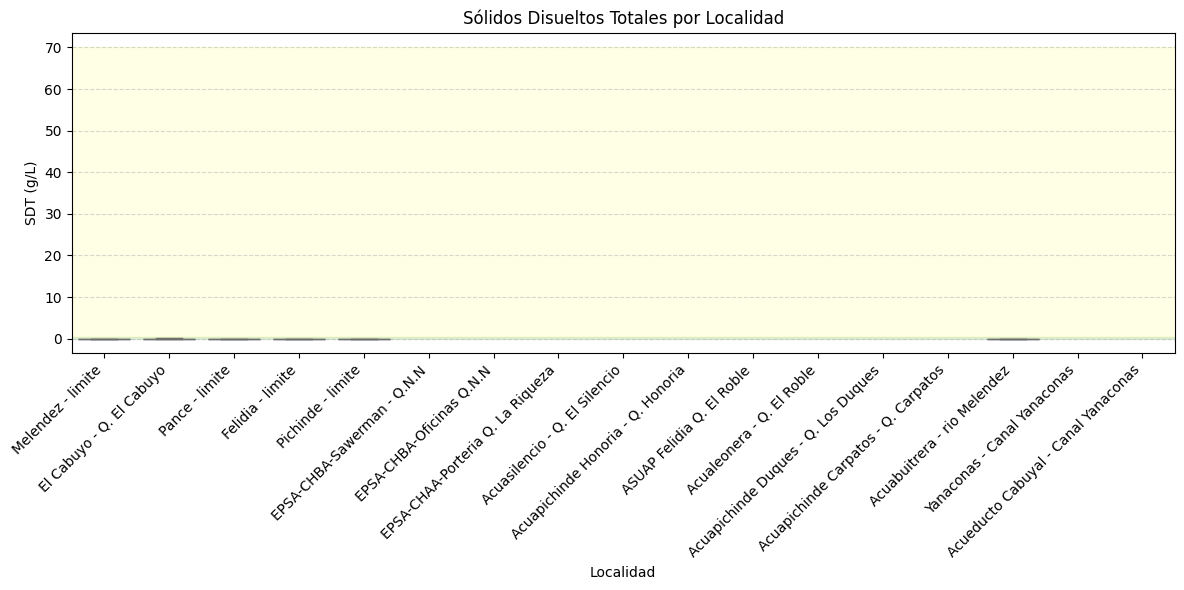

In [ ]:
zonas_sdt = [
    (0, 0.5, 'green'),
    (0.5, 70, 'yellow')
]#sacados de la cartilla


plt.figure(figsize=(12, 6))

# Agregar zonas de color al fondo
for ymin, ymax, color in zonas_sdt:
    plt.axhspan(ymin, ymax, color=color, alpha=0.1)

# Gráfico de cajas
sns.boxplot(
    data=df_sdt,
    x='Localidad',
    y='Solidos disueltos TDS (g/L)',
    palette='pastel'
)

# Limitar el eje Y
#plt.ylim(0, 1)

# Ajustes estéticos
plt.title('Sólidos Disueltos Totales por Localidad')
plt.xlabel('Localidad')
plt.ylabel('SDT (g/L)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig("SDT.png", dpi=300, bbox_inches='tight')
plt.show()

## Indicador 1.7 - Redox

In [ ]:
columnas_elegibles_redox = ['Fecha de la Coordenada ', 'Localidad', 'ORP mV', 'Lider del Muestreo', 'Comentarios del registro']
df_redox = rh_filtro1[rh_filtro1['Categoria de Observación 2'] == 'Fisicoquimicos']
df_redox = df_redox.loc[:, columnas_elegibles_redox]
df_redox.head(5)

,Fecha de la Coordenada,Localidad,ORP mV,Lider del Muestreo,Comentarios del registro
1,2025-09-24,Melendez - limite,NaN,John Sebastian Ovalle Talaga,no se pudo realizar porque las sondas siguen e...
4,2025-09-24,El Cabuyo - Q. El Cabuyo,NaN,John Sebastian Ovalle Talaga,no se pudo realizar porque las sondas siguen e...
6,2025-09-24,Pance - limite,NaN,John Sebastian Ovalle Talaga,no fue posible realizarlo porque las sondas si...
8,2025-09-18,Felidia - limite,109.8,Gustavo Adolfo Rodríguez,Río crecido
10,2025-09-16,Pichinde - limite,105.5,Leonardo Belalcazar Salcedo,NaN


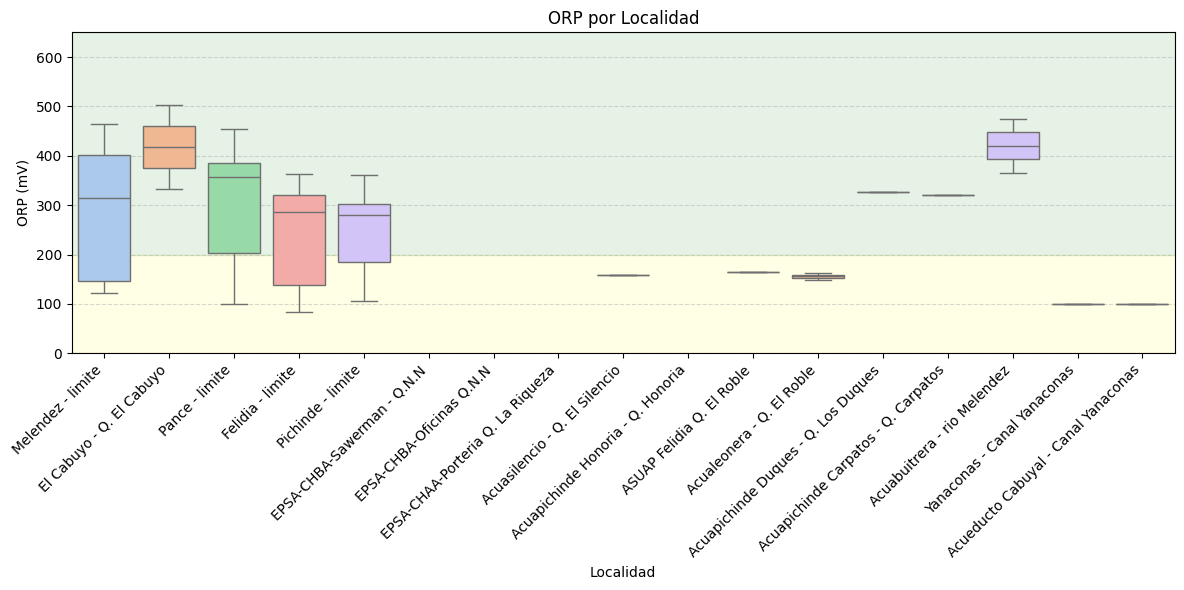

In [ ]:
zonas_redox = [
    (650, 2000, 'yellow'),
    (200, 650, 'green'),
    (0, 200, 'yellow'),
    (-300, 0, 'red'),
]


plt.figure(figsize=(12, 6))

# Agregar zonas de color al fondo
for ymin, ymax, color in zonas_redox:
    plt.axhspan(ymin, ymax, color=color, alpha=0.1)

# Gráfico de cajas
sns.boxplot(
    data=df_redox,
    x='Localidad',
    y='ORP mV',
    palette='pastel'
)

plt.ylim(0, 650)

# Ajustes estéticos
plt.title('ORP por Localidad')
plt.xlabel('Localidad')
plt.ylabel('ORP (mV)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig("redox.png", dpi=300, bbox_inches='tight')
plt.show()

## Descargas de gráficas

In [ ]:
from google.colab import files

graficas = [
    "oxigeno_disuelto.png",
    "conductividad.png",
    #"caudal_subgraficas.png",
    "ph.png",
    "redox.png",
    "Turbidez.png",
    "SDT.png"
]

# Descargar cada archivo
for archivo in graficas:
    files.download(archivo)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Indicador 1.8 - Concentración de mercurio en sedimentos

carga de base de datos como mercurio.csv
en este formato

|Mina|Observacion|Mercurio (mg/kg)|Fecha|
|---|----|---|---|
|Anchicaya|0|35.4|April-15|
|Ferney|0|1.46|April-15|
|Anchicaya|1|0.008|October-15|


In [ ]:
mercurio2=pd.read_csv("/content/mercurio.csv", sep=';')
mercurio2['Fecha'] = pd.to_datetime(mercurio2['Fecha'], format='%B-%y')
mercurio2 = mercurio2.dropna(subset=['Mina'])
mercurio2 = mercurio2.dropna(subset=['Mina', 'Mercurio (mg/kg)', 'Fecha'])
mercurio2.head(5)


,Mina,Observacion,Mercurio (mg/kg),Fecha
0,Anchicaya,0,35.800,2015-04-01
1,Ferney,0,1.460,2015-04-01
2,Simon Bolivar,0,2.840,2015-04-01
3,Teofilo,0,1.570,2015-04-01
10,Quebrada Juntas,0,0.081,2015-04-01


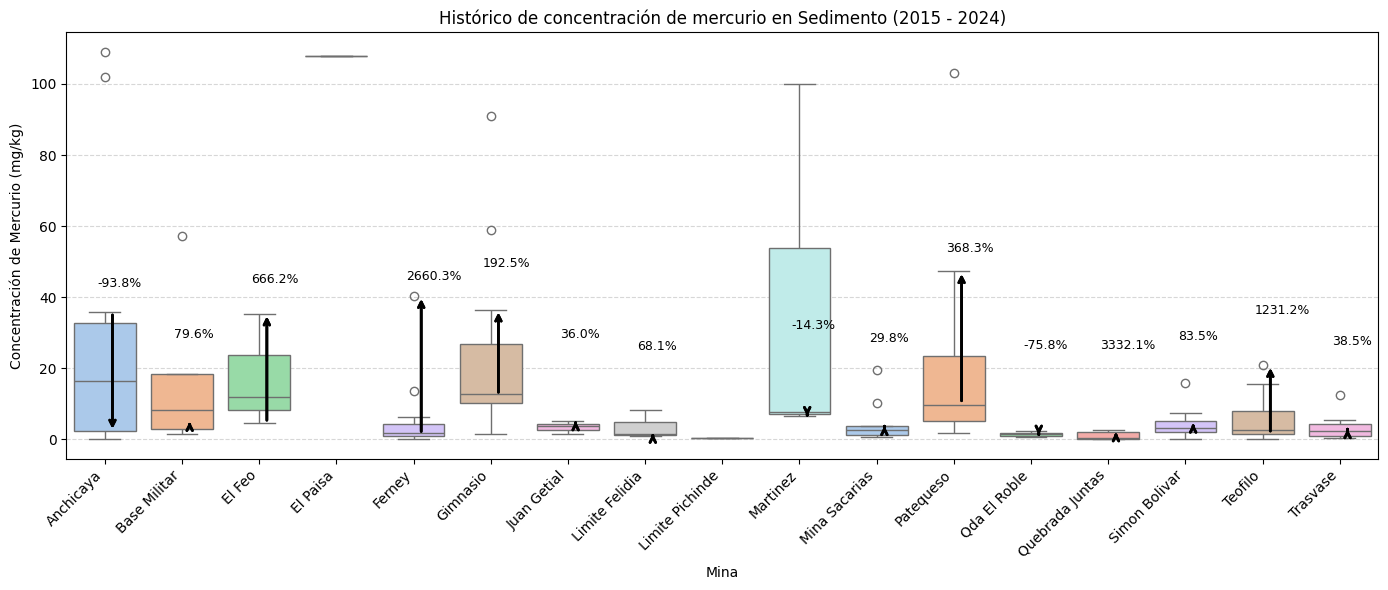

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que la columna Fecha sea datetime y limpia
mercurio2 = mercurio2.dropna(subset=['Mina', 'Mercurio (mg/kg)', 'Fecha']).copy()
mercurio2['Fecha'] = pd.to_datetime(mercurio2['Fecha'])
mercurio2['Mina'] = mercurio2['Mina'].astype(str)

# Definir orden fijo de minas (por orden alfabético o el que tú quieras)
orden_minas = sorted(mercurio2['Mina'].unique())

# Crear un dict para mapear Mina a posición en el eje x
posiciones_mina = {mina: i for i, mina in enumerate(orden_minas)}

# Crear gráfico
plt.figure(figsize=(14, 6))
sns.boxplot(data=mercurio2, x='Mina', y='Mercurio (mg/kg)', palette='pastel', order=orden_minas)

# Añadir flechas por mina
for mina in orden_minas:
    datos_mina = mercurio2[mercurio2['Mina'] == mina].sort_values('Fecha')

    if len(datos_mina) >= 2:
        y_inicio = datos_mina.iloc[0]['Mercurio (mg/kg)']
        y_fin = datos_mina.iloc[-1]['Mercurio (mg/kg)']
        #print(x, y_inicio)
        #print(x, y_fin)
        if pd.notnull(y_inicio) and pd.notnull(y_fin):
            x = posiciones_mina[mina]
            plt.annotate(
                '',
                xy=(x + 0.1, y_fin),
                xytext=(x + 0.1, y_inicio),
                arrowprops=dict(arrowstyle="->", color='black', lw=2),
                ha='center'
            )

            # Calcular el porcentaje de cambio
            porcentaje_cambio = ((y_fin - y_inicio) / y_inicio) * 100

            # Dibujar la flecha
            plt.annotate(
                '',
                xy=(x + 0.1, y_fin),
                xytext=(x + 0.1, y_inicio),
                arrowprops=dict(arrowstyle="->", color='black', lw=2),
                ha='center'
            )

            # Añadir el texto del porcentaje sobre la flecha
            plt.text(
                x - 0.1,                        # X (ligeramente desplazado para no solaparse con la flecha)
                (y_inicio + y_fin) / 2 + 25,   # Y (posición vertical, ligeramente por encima de la mitad)
                f'{porcentaje_cambio:.1f}%',    # Texto del porcentaje con 1 decimal
                color='black',
                ha='left',
                va='center',
                fontsize=9
            )

# Ajustes estéticos
plt.title('Histórico de concentración de mercurio en Sedimento (2015 - 2024)')
plt.xlabel('Mina')
plt.ylabel('Concentración de Mercurio (mg/kg)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig("mercurio_sedimento.png", dpi=300, bbox_inches='tight')
plt.show()


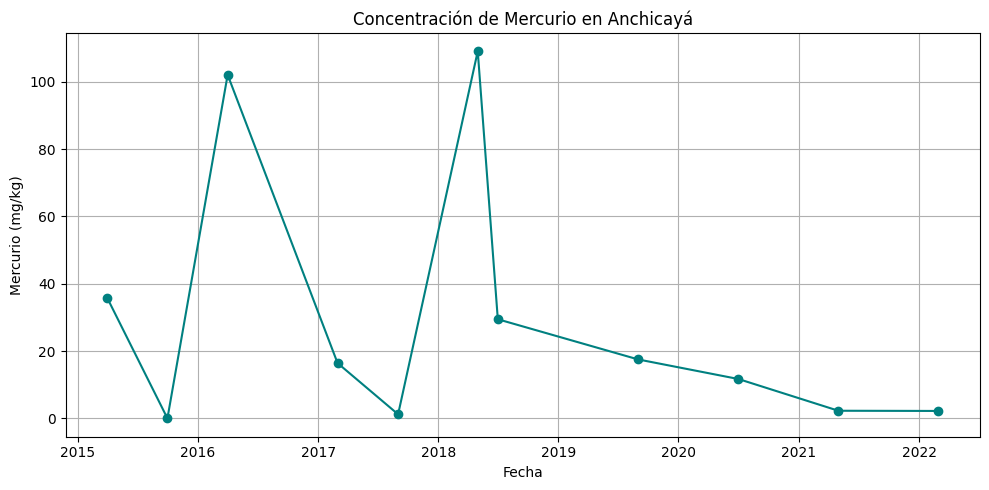

In [ ]:
# Filtrar los datos para la mina Anchicayá
anchicaya = mercurio2[mercurio2['Mina'] == 'Anchicaya'].copy()

# Asegurar que la columna Fecha esté en formato datetime
anchicaya['Fecha'] = pd.to_datetime(anchicaya['Fecha'])

# Ordenar por fecha para una mejor visualización
anchicaya = anchicaya.sort_values('Fecha')

# Graficar la concentración de mercurio a lo largo del tiempo
plt.figure(figsize=(10, 5))
plt.plot(anchicaya['Fecha'], anchicaya['Mercurio (mg/kg)'], marker='o', linestyle='-', color='teal')
plt.title('Concentración de Mercurio en Anchicayá')
plt.xlabel('Fecha')
plt.ylabel('Mercurio (mg/kg)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
anchicaya

,Mina,Observacion,Mercurio (mg/kg),Fecha
0,Anchicaya,0,35.800,2015-04-01
17,Anchicaya,1,0.008,2015-10-01
34,Anchicaya,2,102.060,2016-04-01
51,Anchicaya,3,16.430,2017-03-01
68,Anchicaya,4,1.210,2017-09-01
85,Anchicaya,5,109.080,2018-05-01
102,Anchicaya,6,29.450,2018-07-01
119,Anchicaya,7,17.500,2019-09-01
136,Anchicaya,8,11.700,2020-07-01
153,Anchicaya,9,2.270,2021-05-01


In [ ]:
from google.colab import files

graficas = [
    "mercurio_sedimento.png"
]

# Descargar cada archivo
for archivo in graficas:
    files.download(archivo)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Macroinvertebrados

Cargar la consulta de recurso hidrico proveniente de SMART con el nombre "macros.csv"

In [ ]:
# Cargar los datos
macros = pd.read_csv("/content/macros.csv", sep=';')

In [ ]:
# Asegurar que la columna de fecha esté en formato datetime
macros['Fecha de la Coordenada '] = pd.to_datetime(macros['Fecha de la Coordenada '])

# Agregar columnas de año y semestre
macros['Año'] = macros['Fecha de la Coordenada '].dt.year
macros['Semestre'] = macros['Fecha de la Coordenada '].dt.month.apply(lambda m: 1 if m <= 6 else 2)

# Solicitar año al usuario
anio_deseado = int(input("Ingrese el año que desea visualizar (ej. 2025): "))

# Filtrar por el año seleccionado
macros_filtrado = macros[macros['Año'] == ano]

Ingrese el año que desea visualizar (ej. 2025): 2025


## Indicador 1.9 - Indice EPT

In [ ]:
# Listas de familias por orden
ephemeroptera = ['Baetidae', 'Caenidae', 'Leptohyphidae', 'Tricorythidae', 'Euthyplociidae', 'Oligoneuriidae', 'Leptophlebiidae', 'Ephemeridae', 'Polymitarcyidae']
plecoptera = ['Perlidae']
trichoptera = ['Hydropsychidae', 'Philopotamidae', 'Leptoceridae', 'Glossosomatidae', 'Odontoceridae', 'Helicopsychidae', 'Xiphocentronidae', 'Calamoceratidae', 'Anomalopsychidae', 'Atriplectidae', 'Hydroptilidae', 'Rhyacophilidae', 'Hydrobiosidae', 'Polycentropodidae']

# Unir todas las familias EPT
familias_ept = set(ephemeroptera + plecoptera + trichoptera)


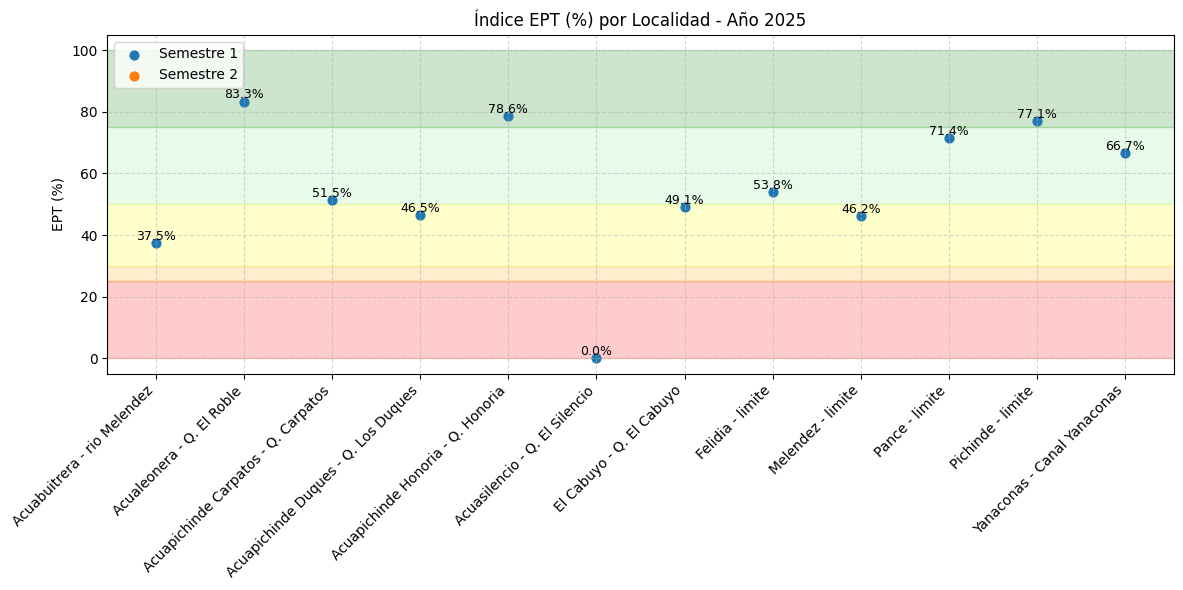

In [ ]:
# Calcular EPT (%) por localidad y semestre usando 'Numero de individuos'
def calcular_ept_porcentaje(df):
    resultados = []
    for (localidad, semestre), grupo in df.groupby(['Localidad', 'Semestre']):
        total = grupo['Numero de individuos'].sum()
        ept = grupo[grupo['Familia'].isin(familias_ept)]['Numero de individuos'].sum()
        porcentaje = (ept / total) * 100 if total > 0 else 0
        resultados.append({'Localidad': localidad, 'Semestre': semestre, 'EPT (%)': porcentaje})
    return pd.DataFrame(resultados)

ept_df = calcular_ept_porcentaje(macros_filtrado)

# Zonas de calidad según los umbrales
zonas_ept = [
    (0, 25, 'red', 'Muy Mala'),
    (25, 30, 'orange', 'Mala'),
    (30, 50, 'yellow', 'Regular'),
    (50, 75, 'lightgreen', 'Buena'),
    (75, 100, 'green', 'Muy Buena')
]

# Graficar
plt.figure(figsize=(12, 6))

# Zonas de fondo
# Zonas de fondo sin etiquetas
for ymin, ymax, color, _ in zonas_ept:
    plt.axhspan(ymin, ymax, color=color, alpha=0.2)


# Puntos por semestre
for semestre in [1, 2]:
    datos = ept_df[ept_df['Semestre'] == semestre]
    plt.scatter(datos['Localidad'], datos['EPT (%)'], label=f"Semestre {semestre}", s=40, marker='o')
    for _, row in datos.iterrows():
        plt.text(row['Localidad'], row['EPT (%)'] + 1, f"{row['EPT (%)']:.1f}%", ha='center', fontsize=9)

plt.xticks(rotation=45, ha='right')
plt.ylabel("EPT (%)")
plt.title(f"Índice EPT (%) por Localidad - Año {ano}")
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("EPT.png", dpi=300, bbox_inches='tight')
plt.show()


## Indicador 1.10 - Indice BMWP/Col


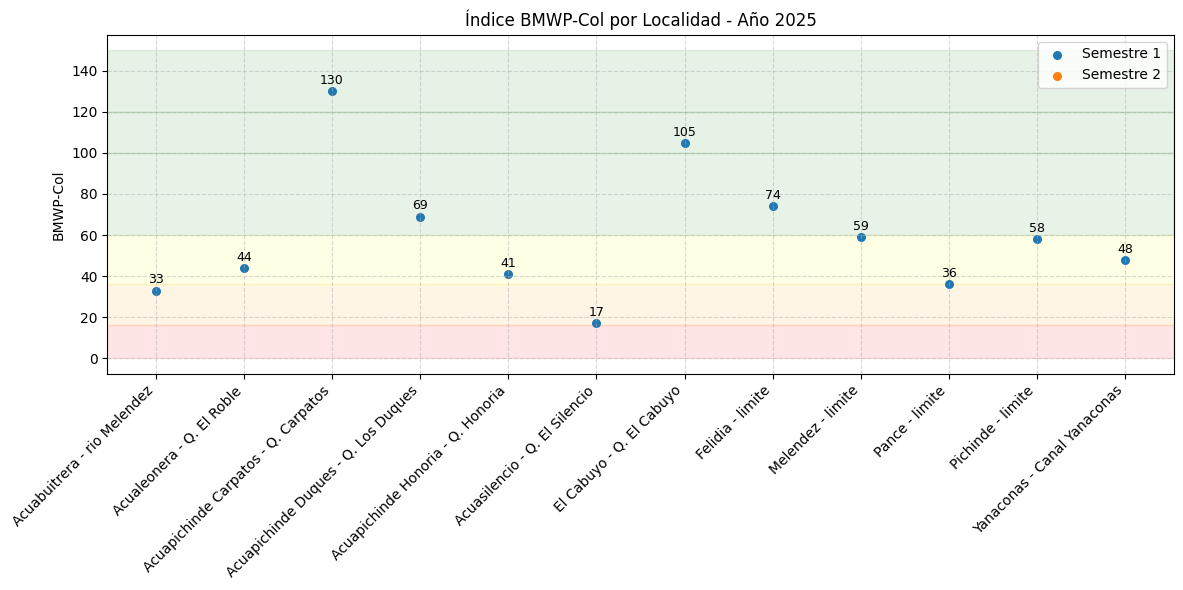

In [ ]:

zonas_bmwp = [
        (0, 16, 'red'),
        (16, 36, 'orange'),
        (36, 60, 'yellow'),
        (60, 100, 'forestgreen'),
        (100, 120, 'green'),
        (120, 150, 'green')
    ]


# Calcular BMWP por localidad y semestre
def calcular_bmwp_por_localidad_y_semestre(df, diccionario_puntajes):
    resultados = []
    for (localidad, semestre), grupo in df.groupby(['Localidad', 'Semestre']):
        familias = grupo['Familia'].dropna().unique()
        puntaje = sum([diccionario_puntajes.get(fam, 0) for fam in set(familias)])
        resultados.append({'Localidad': localidad, 'Semestre': semestre, 'BMWP': puntaje})
    return pd.DataFrame(resultados)

# Asegúrate de tener definido bmwp_col_dict
bmwp_df = calcular_bmwp_por_localidad_y_semestre(macros_filtrado, bmwp_col_dict)

# Graficar puntos por localidad (semestre 1 y 2) con etiquetas
plt.figure(figsize=(12, 6))

# Agregar las zonas de color al fondo
for ymin, ymax, color in zonas_bmwp:
    plt.axhspan(ymin, ymax, color=color, alpha=0.1)

for semestre in [1, 2]:
    datos = bmwp_df[bmwp_df['Semestre'] == semestre]
    plt.scatter(datos['Localidad'], datos['BMWP'], label=f"Semestre {semestre}", s=30)


    # Añadir etiquetas encima de cada punto
    for i, row in datos.iterrows():
        plt.text(row['Localidad'], row['BMWP'] + 2, str(row['BMWP']),
                 ha='center', va='bottom', fontsize=9, color='black')

plt.xticks(rotation=45, ha='right')
plt.ylabel("BMWP-Col")
plt.title(f"Índice BMWP-Col por Localidad - Año {ano}")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("BMWP.png", dpi=300, bbox_inches='tight')
plt.show()

# Actividad minera

## Carga de datos

Cargar la consulta proveniente de SMART como actividad_minera.csv

In [ ]:
mineria=pd.read_csv("/content/actividad_minera.csv", sep=';')
mineria['Fecha de coordenada '] = pd.to_datetime(mineria['Fecha de coordenada '])
mineria.head(5)

,Fuente,ID de coordenada,Fecha de coordenada,Hora,X,Y,Ultima modificacion,Última modificación por,Categoria de observación,Categoria de observación.1,...,Ancho socavon (m),Caracteristicas de la bocamina,Comentario,Estado de la bocamina,Estructura,Localidad minera,Longitud socavon (m),Nuevo hallazgo,Tipo mineria,Grupo de observación
0,Estudio,19,2025-06-14,3:45:17 p. m.,-76.695873,3.414352,"18/06/2025, 5:45:42 p. m.",John Sebastian Ovalle Talaga,MONITOREO,Actividad Minera,...,25.0,NaN,Nuevo socavon 2. Patequeso. Con entrada de est...,Activo,Socavon,Mina Patequeso,15.0,Si,Aluvion,f229bdb556774948b503bb967f751808
1,Estudio,18,2025-06-14,3:29:15 p. m.,-76.695583,3.414715,"18/06/2025, 5:45:09 p. m.",John Sebastian Ovalle Talaga,MONITOREO,Actividad Minera,...,1.5,NaN,Parte alts Patequeso.Encontramos un nuevo soca...,Activo,Socavon,Mina Patequeso,NaN,No,Aluvion,d2551c055e2a4cc0abb1f1d15e6cde94
2,Estudio,17,2025-06-14,2:42:29 p. m.,-76.695137,3.415150,"18/06/2025, 5:44:13 p. m.",John Sebastian Ovalle Talaga,MONITOREO,Actividad Minera,...,1.9,NaN,"Nuevo socavón, Patequeso, tomando el camino de...",Activo,Socavon,Mina Patequeso,3.6,Si,Aluvion,aa624b97112a4d239552c1c34eefe193
3,Estudio,16,2025-06-14,1:44:08 p. m.,-76.691950,3.413689,"18/06/2025, 5:43:36 p. m.",John Sebastian Ovalle Talaga,MONITOREO,Actividad Minera,...,0.0,Derrumbado,"Socavón Simon Bolivar, hubo un derrumbe natura...",Inactivo,Socavon,Mina Simon Bolivar,0.0,No,Aluvion,85db22b469d74ba6a0a98b61f0be5ffb
4,Estudio,15,2025-06-14,1:35:38 p. m.,-76.689738,3.411759,"26/06/2025, 10:08:46 a. m.",John Sebastian Ovalle Talaga,MONITOREO,Actividad Minera,...,1.3,NaN,Se encuentra inactivo,Inactivo,Socavon,Mina El Feo,10.0,No,Aluvion,557141467c2941f1802a78b413e8e1be


## Actividad minera

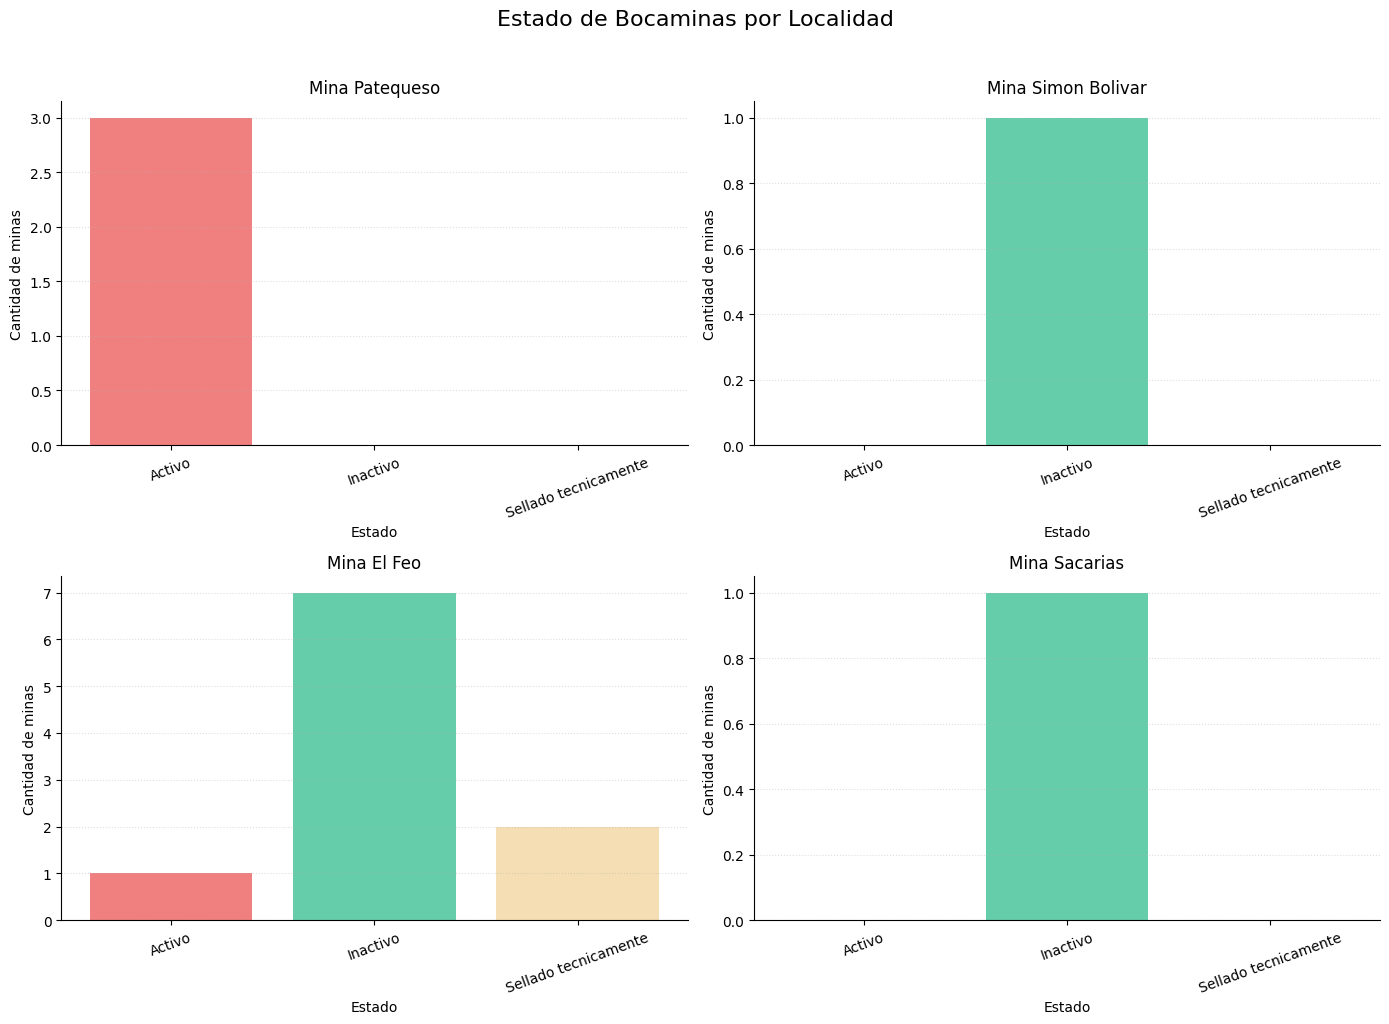

In [ ]:
import matplotlib.pyplot as plt
import math

# Estados y colores más sobrios tipo caudal
estado_orden = ['Activo', 'Inactivo', 'Sellado tecnicamente']
colores = {
    'Activo': 'lightcoral',
    'Inactivo': 'mediumaquamarine',
    'Sellado tecnicamente': 'wheat'
}

# Localidades únicas y figura
localidades = mineria['Localidad minera'].dropna().unique()
n_localidades = len(localidades)
n_cols = 2
n_rows = math.ceil(n_localidades / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(14, 10))
axs = axs.flatten()

# Gráficos por localidad
for i, loc in enumerate(localidades):
    subset = mineria[mineria['Localidad minera'] == loc]
    conteo = subset['Estado de la bocamina'].value_counts().reindex(estado_orden, fill_value=0)

    bars = axs[i].bar(
        conteo.index,
        conteo.values,
        color=[colores.get(est, 'lightgray') for est in conteo.index],
        #edgecolor='black'
    )

    axs[i].set_title(f'{loc}', fontsize=12)
    axs[i].set_xlabel('Estado')
    axs[i].set_ylabel('Cantidad de minas')
    axs[i].tick_params(axis='x', rotation=20)
    axs[i].set_ylim(bottom=0)
    axs[i].grid(True, axis='y', linestyle=':', alpha=0.4)
    axs[i].spines[['top', 'right']].set_visible(False)

# Remueve ejes vacíos
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.suptitle('Estado de Bocaminas por Localidad - 2025', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


# Pruebas